## **Smart Fouls** - **_Serie A_**

In [48]:
#imports
import pandas as pd
import numpy as np

import bs4
import requests

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from highlight_text import fig_text

from PIL import Image
import urllib

##### **Data Retrieval**

_Miscellaneous stats_
- https://fbref.com/en/comp/11/misc/Statistiche-di-Serie-A

In [3]:
serieA_teams = pd.read_html('https://fbref.com/en/comp/11/misc/Statistiche-di-Serie-A', attrs={'id':'stats_squads_misc_for'})[0]
serieA_teams.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Performance        
               Squad               # Pl                90s        CrdY CrdR   
0           Atalanta                 28               33.0          70    1  \
1            Bologna                 27               34.0          79    2   
2           Cagliari                 28               33.0          66    3   
3             Empoli                 34               34.0          74    0   
4         Fiorentina                 29               33.0          71    0   

                                                          Aerial Duels        
  2CrdY  Fls  Fld Off  Crs  Int TklW PKwon PKcon OG Recov          Won Lost   
0     1  422  320  52  624  296  325     3     8  1  1778          550  439  \
1     2  416  403  47  457  227  344     3     6  1  1627          371  372   
2     2  410  355  50  742  237  280     2     4  3  1566          479  516   
3     0  458  460  68  599  232  342     3     7  1  1470          445  562   
4     0  400  395  46  673  205  283     5     8  0  1527          535  523   

         
   Won%  
0  55.6  
1  49.9  
2  48.1  
3  44.2  
4  50.6

In [6]:
serieA_teams.columns = [' '.join(col).strip() for col in serieA_teams.columns]
serieA_teams.head()

,Unnamed: 0_level_0 Squad,Unnamed: 1_level_0 # Pl,Unnamed: 2_level_0 90s,Performance CrdY,Performance CrdR,Performance 2CrdY,Performance Fls,Performance Fld,Performance Off,Performance Crs,Performance Int,Performance TklW,Performance PKwon,Performance PKcon,Performance OG,Performance Recov,Aerial Duels Won,Aerial Duels Lost,Aerial Duels Won%
0,Atalanta,28,33.0,70,1,1,422,320,52,624,296,325,3,8,1,1778,550,439,55.6
1,Bologna,27,34.0,79,2,2,416,403,47,457,227,344,3,6,1,1627,371,372,49.9
2,Cagliari,28,33.0,66,3,2,410,355,50,742,237,280,2,4,3,1566,479,516,48.1
3,Empoli,34,34.0,74,0,0,458,460,68,599,232,342,3,7,1,1470,445,562,44.2
4,Fiorentina,29,33.0,71,0,0,400,395,46,673,205,283,5,8,0,1527,535,523,50.6


In [10]:
# create a list with new column names
new_columns = []
for col in serieA_teams.columns:
    if 'level_0' in col:
        new_col = col.split()[-1]  # takes the last name
    else:
        new_col = col
    new_columns.append(new_col)

# rename columns
serieA_teams.columns = new_columns
serieA_teams

,Squad,Pl,90s,Performance CrdY,Performance CrdR,Performance 2CrdY,Performance Fls,Performance Fld,Performance Off,Performance Crs,Performance Int,Performance TklW,Performance PKwon,Performance PKcon,Performance OG,Performance Recov,Aerial Duels Won,Aerial Duels Lost,Aerial Duels Won%
0,Atalanta,28,33.0,70,1,1,422,320,52,624,296,325,3,8,1,1778,550,439,55.6
1,Bologna,27,34.0,79,2,2,416,403,47,457,227,344,3,6,1,1627,371,372,49.9
2,Cagliari,28,33.0,66,3,2,410,355,50,742,237,280,2,4,3,1566,479,516,48.1
3,Empoli,34,34.0,74,0,0,458,460,68,599,232,342,3,7,1,1470,445,562,44.2
4,Fiorentina,29,33.0,71,0,0,400,395,46,673,205,283,5,8,0,1527,535,523,50.6
5,Frosinone,34,34.0,63,2,1,354,396,47,458,218,294,8,8,2,1623,469,539,46.5
6,Genoa,32,33.0,76,3,3,394,356,37,535,292,316,2,3,1,1453,525,465,53.0
7,Hellas Verona,34,34.0,80,5,2,474,401,53,636,264,344,3,2,1,1663,671,547,55.1
8,Inter,26,34.0,44,1,0,369,363,64,738,254,293,11,4,0,1463,471,333,58.6
9,Juventus,29,34.0,77,2,1,417,337,66,639,233,329,3,3,2,1489,442,390,53.1


In [12]:
# save as csv
serieA_teams.to_csv('../data/serieA_23-24_teams_misc.csv',index=False)

In [16]:
url = 'https://fbref.com/en/comp/11/misc/Statistiche-di-Serie-A'
r = requests.get(url)
soup = bs4.BeautifulSoup(r.content, "html.parser")

table_id = """<div class="table_container" id="div_stats_misc">"""
table = (
   soup.find(attrs={"data-label": "Player Miscellaneous Stats"})
       .find_next(string=lambda tag: 
          isinstance(tag, bs4.element.Comment) and table_id in tag
   )
)

serieA_players = pd.read_html(table)[0]

In [17]:
serieA_players

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0   
                    Rk             Player             Nation   
0                    1      Tammy Abraham            eng ENG  \
1                    2   Francesco Acerbi             it ITA   
2                    3        Yacine Adli             fr FRA   
3                    4   Michel Aebischer             ch SUI   
4                    5      Lucien Agoume             fr FRA   
..                 ...                ...                ...   
615                593       Nadir Zortea             it ITA   
616                594   Szymon Żurkowski             pl POL   
617                595        Milan Đurić             ba BIH   
618                596        Milan Đurić             ba BIH   
619                597   Mateusz Łęgowski             pl POL   

    Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0   
                   Pos              Squad                Age   
0                   FW               Roma             26-210  \
1                   DF              Inter             36-079   
2                   MF              Milan             23-275   
3                   MF            Bologna             27-114   
4                   MF              Inter             22-080   
..                 ...                ...                ...   
615                 DF           Atalanta             24-315   
616                 MF             Empoli             26-217   
617                 FW      Hellas Verona             33-343   
618                 FW              Monza             33-343   
619                 MF        Salernitana             21-091   

    Unnamed: 6_level_0 Unnamed: 7_level_0 Performance       ...            
                  Born                90s        CrdY CrdR  ... Int TklW   
0                 1997                1.2           0    0  ...   0    0  \
1                 1988               24.5           1    0  ...  31   12   
2                 2000               15.2           3    0  ...  20   17   
3                 1997               21.9           6    0  ...  11   18   
4                 2002                0.1           0    0  ...   0    0   
..                 ...                ...         ...  ...  ...  ..  ...   
615               1999                1.7           1    0  ...   1    4   
616               1997                9.4           3    0  ...   6    6   
617               1990               13.4           2    0  ...   1    0   
618               1990               10.5           2    0  ...   0    5   
619               2003               12.1           3    0  ...   7   11   

                         Aerial Duels             Unnamed: 24_level_0  
    PKwon PKcon OG Recov          Won Lost   Won%             Matches  
0       0     0  0     0            3    2   60.0             Matches  
1       0     0  0    97           65   33   66.3             Matches  
2       0     1  0    91           15    9   62.5             Matches  
3       0     0  0   116           11   15   42.3             Matches  
4       0     0  0     0            1    0  100.0             Matches  
..    ...   ... ..   ...          ...  ...    ...                 ...  
615     0     0  0     4            0    2    0.0             Matches  
616     0     0  0    37            6   17   26.1             Matches  
617     0     0  0    25          135   43   75.8             Matches  
618     0     0  0    25           60   34   63.8             Matches  
619     0     0  0    60           13   16   44.8             Matches  

[620 rows x 25 columns]

In [18]:
serieA_players.columns = [' '.join(col).strip() for col in serieA_players.columns]

# create a list with new column names
new_columns = []
for col in serieA_players.columns:
    if 'level_0' in col:
        new_col = col.split()[-1]  # takes the last name
    else:
        new_col = col
    new_columns.append(new_col)

# rename columns
serieA_players.columns = new_columns

serieA_players

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Performance CrdY,Performance CrdR,...,Performance Int,Performance TklW,Performance PKwon,Performance PKcon,Performance OG,Performance Recov,Aerial Duels Won,Aerial Duels Lost,Aerial Duels Won%,Matches
0,1,Tammy Abraham,eng ENG,FW,Roma,26-210,1997,1.2,0,0,...,0,0,0,0,0,0,3,2,60.0,Matches
1,2,Francesco Acerbi,it ITA,DF,Inter,36-079,1988,24.5,1,0,...,31,12,0,0,0,97,65,33,66.3,Matches
2,3,Yacine Adli,fr FRA,MF,Milan,23-275,2000,15.2,3,0,...,20,17,0,1,0,91,15,9,62.5,Matches
3,4,Michel Aebischer,ch SUI,MF,Bologna,27-114,1997,21.9,6,0,...,11,18,0,0,0,116,11,15,42.3,Matches
4,5,Lucien Agoume,fr FRA,MF,Inter,22-080,2002,0.1,0,0,...,0,0,0,0,0,0,1,0,100.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,593,Nadir Zortea,it ITA,DF,Atalanta,24-315,1999,1.7,1,0,...,1,4,0,0,0,4,0,2,0.0,Matches
616,594,Szymon Żurkowski,pl POL,MF,Empoli,26-217,1997,9.4,3,0,...,6,6,0,0,0,37,6,17,26.1,Matches
617,595,Milan Đurić,ba BIH,FW,Hellas Verona,33-343,1990,13.4,2,0,...,1,0,0,0,0,25,135,43,75.8,Matches
618,596,Milan Đurić,ba BIH,FW,Monza,33-343,1990,10.5,2,0,...,0,5,0,0,0,25,60,34,63.8,Matches


In [20]:
# clean data
serieA_players['Age'] = serieA_players['Age'].str[:2]
serieA_players['Position'] = serieA_players['Pos'].str[:2]
serieA_players['Nation'] = serieA_players['Nation'].str.split(' ').str.get(1)
serieA_players = serieA_players.drop(columns=['Rk', 'Pos', 'Matches'])

serieA_players.head()

,Player,Nation,Squad,Age,Born,90s,Performance CrdY,Performance CrdR,Performance 2CrdY,Performance Fls,...,Performance Int,Performance TklW,Performance PKwon,Performance PKcon,Performance OG,Performance Recov,Aerial Duels Won,Aerial Duels Lost,Aerial Duels Won%,Position
0,Tammy Abraham,ENG,Roma,26,1997,1.2,0,0,0,1,...,0,0,0,0,0,0,3,2,60.0,FW
1,Francesco Acerbi,ITA,Inter,36,1988,24.5,1,0,0,19,...,31,12,0,0,0,97,65,33,66.3,DF
2,Yacine Adli,FRA,Milan,23,2000,15.2,3,0,0,25,...,20,17,0,1,0,91,15,9,62.5,MF
3,Michel Aebischer,SUI,Bologna,27,1997,21.9,6,0,0,35,...,11,18,0,0,0,116,11,15,42.3,MF
4,Lucien Agoume,FRA,Inter,22,2002,0.1,0,0,0,0,...,0,0,0,0,0,0,1,0,100.0,MF


In [21]:
# save as csv
serieA_players.to_csv('../data/serieA_23-24_players_misc.csv',index=False)

##### **Data Preparation**

In [2]:
serieA_teams = pd.read_csv('../data/serieA_23-24_teams_misc.csv')

In [3]:
print(serieA_teams.shape)
print('')
print(serieA_teams.columns)

(20, 19)

Index(['Squad', 'Pl', '90s', 'Performance CrdY', 'Performance CrdR',
       'Performance 2CrdY', 'Performance Fls', 'Performance Fld',
       'Performance Off', 'Performance Crs', 'Performance Int',
       'Performance TklW', 'Performance PKwon', 'Performance PKcon',
       'Performance OG', 'Performance Recov', 'Aerial Duels Won',
       'Aerial Duels Lost', 'Aerial Duels Won%'],
      dtype='object')


In [40]:
serieA_teams.dtypes

Squad                 object
Pl                     int64
90s                  float64
Performance CrdY       int64
Performance CrdR       int64
Performance 2CrdY      int64
Performance Fls        int64
Performance Fld        int64
Performance Off        int64
Performance Crs        int64
Performance Int        int64
Performance TklW       int64
Performance PKwon      int64
Performance PKcon      int64
Performance OG         int64
Performance Recov      int64
Aerial Duels Won       int64
Aerial Duels Lost      int64
Aerial Duels Won%    float64
dtype: object

In [4]:
serieA_players = pd.read_csv('../data/serieA_23-24_players_misc.csv')

In [5]:
print(serieA_players.shape)
print('')
print(serieA_players.columns)

(620, 23)

Index(['Player', 'Nation', 'Squad', 'Age', 'Born', '90s', 'Performance CrdY',
       'Performance CrdR', 'Performance 2CrdY', 'Performance Fls',
       'Performance Fld', 'Performance Off', 'Performance Crs',
       'Performance Int', 'Performance TklW', 'Performance PKwon',
       'Performance PKcon', 'Performance OG', 'Performance Recov',
       'Aerial Duels Won', 'Aerial Duels Lost', 'Aerial Duels Won%',
       'Position'],
      dtype='object')


In [6]:
serieA_players.dtypes

Player               object
Nation               object
Squad                object
Age                  object
Born                 object
90s                  object
Performance CrdY     object
Performance CrdR     object
Performance 2CrdY    object
Performance Fls      object
Performance Fld      object
Performance Off      object
Performance Crs      object
Performance Int      object
Performance TklW     object
Performance PKwon    object
Performance PKcon    object
Performance OG       object
Performance Recov    object
Aerial Duels Won     object
Aerial Duels Lost    object
Aerial Duels Won%    object
Position             object
dtype: object

In [7]:
columns_to_convert = ['Age', 'Born', '90s', 'Performance CrdY',
       'Performance CrdR', 'Performance 2CrdY', 'Performance Fls',
       'Performance Fld', 'Performance Off', 'Performance Crs',
       'Performance Int', 'Performance TklW', 'Performance PKwon',
       'Performance PKcon', 'Performance OG', 'Performance Recov',
       'Aerial Duels Won', 'Aerial Duels Lost', 'Aerial Duels Won%']

# convert columns to numeric
serieA_players[columns_to_convert] = serieA_players[columns_to_convert].apply(pd.to_numeric, errors='coerce')

##### **Data Modeling**

`90s` is equal to minutes played divided by 90, in this case it corresponds to the number of games played by the team; `Pl` refers to the number of players in the squad.

`CrdY` - Yellow Cards
`CrdR` - Red Cards
`2Crdy` - Second Yellow Card
`Fls` - Fouls Committed
`Fld` - Fouls Drawn

Columns to add: `minutes`, `fouls per 90`, `cards`, `cards per foul`

Here, `CrdY` already counts two yellow cards for a sent-off, so `cards` is equal to the sum of yellow and red cards.

In [41]:
serieA_teams.head(2)

,Squad,Pl,90s,Performance CrdY,Performance CrdR,Performance 2CrdY,Performance Fls,Performance Fld,Performance Off,Performance Crs,Performance Int,Performance TklW,Performance PKwon,Performance PKcon,Performance OG,Performance Recov,Aerial Duels Won,Aerial Duels Lost,Aerial Duels Won%
0,Atalanta,28,33.0,70,1,1,422,320,52,624,296,325,3,8,1,1778,550,439,55.6
1,Bologna,27,34.0,79,2,2,416,403,47,457,227,344,3,6,1,1627,371,372,49.9


In [43]:
serieA_teams['minutes'] = serieA_teams['90s'] * 90
serieA_teams['cards'] = serieA_teams['Performance CrdY'] + serieA_teams['Performance CrdR']
serieA_teams['fouls per 90'] = serieA_teams['Performance Fls'] / serieA_teams['90s']
serieA_teams['cards per foul'] = serieA_teams['cards'] / serieA_teams['Performance Fls']
serieA_teams['fouls per card'] = serieA_teams['Performance Fls'] / serieA_teams['cards']
serieA_teams.head()

,Squad,Pl,90s,Performance CrdY,Performance CrdR,Performance 2CrdY,Performance Fls,Performance Fld,Performance Off,Performance Crs,...,Performance OG,Performance Recov,Aerial Duels Won,Aerial Duels Lost,Aerial Duels Won%,minutes,cards,fouls per 90,cards per foul,fouls per card
0,Atalanta,28,33.0,70,1,1,422,320,52,624,...,1,1778,550,439,55.6,2970.0,71,12.787879,0.168246,5.943662
1,Bologna,27,34.0,79,2,2,416,403,47,457,...,1,1627,371,372,49.9,3060.0,81,12.235294,0.194712,5.135802
2,Cagliari,28,33.0,66,3,2,410,355,50,742,...,3,1566,479,516,48.1,2970.0,69,12.424242,0.168293,5.942029
3,Empoli,34,34.0,74,0,0,458,460,68,599,...,1,1470,445,562,44.2,3060.0,74,13.470588,0.161572,6.189189
4,Fiorentina,29,33.0,71,0,0,400,395,46,673,...,0,1527,535,523,50.6,2970.0,71,12.121212,0.177500,5.633803


In [42]:
serieA_players.head(2)

,Player,Nation,Squad,Age,Born,90s,Performance CrdY,Performance CrdR,Performance 2CrdY,Performance Fls,...,Performance Recov,Aerial Duels Won,Aerial Duels Lost,Aerial Duels Won%,Position,minutes,cards,fouls per 90,cards per foul,fouls per card
0,Tammy Abraham,ENG,Roma,26.0,1997.0,1.2,0.0,0.0,0.0,1.0,...,0.0,3.0,2.0,60.0,FW,108.0,0.0,0.833333,0.000000,inf
1,Francesco Acerbi,ITA,Inter,36.0,1988.0,24.5,1.0,0.0,0.0,19.0,...,97.0,65.0,33.0,66.3,DF,2205.0,1.0,0.775510,0.052632,19.0


In [8]:
serieA_players['minutes'] = serieA_players['90s'] * 90
serieA_players['cards'] = serieA_players['Performance CrdY'] + serieA_players['Performance CrdR']
serieA_players['fouls per 90'] = serieA_players['Performance Fls'] / serieA_players['90s']
serieA_players['cards per foul'] = serieA_players['cards'] / serieA_players['Performance Fls']
serieA_players['fouls per card'] = serieA_players['Performance Fls'] / serieA_players['cards']
serieA_players.head()

,Player,Nation,Squad,Age,Born,90s,Performance CrdY,Performance CrdR,Performance 2CrdY,Performance Fls,...,Performance Recov,Aerial Duels Won,Aerial Duels Lost,Aerial Duels Won%,Position,minutes,cards,fouls per 90,cards per foul,fouls per card
0,Tammy Abraham,ENG,Roma,26.0,1997.0,1.2,0.0,0.0,0.0,1.0,...,0.0,3.0,2.0,60.0,FW,108.0,0.0,0.833333,0.000000,inf
1,Francesco Acerbi,ITA,Inter,36.0,1988.0,24.5,1.0,0.0,0.0,19.0,...,97.0,65.0,33.0,66.3,DF,2205.0,1.0,0.775510,0.052632,19.000000
2,Yacine Adli,FRA,Milan,23.0,2000.0,15.2,3.0,0.0,0.0,25.0,...,91.0,15.0,9.0,62.5,MF,1368.0,3.0,1.644737,0.120000,8.333333
3,Michel Aebischer,SUI,Bologna,27.0,1997.0,21.9,6.0,0.0,0.0,35.0,...,116.0,11.0,15.0,42.3,MF,1971.0,6.0,1.598174,0.171429,5.833333
4,Lucien Agoume,FRA,Inter,22.0,2002.0,0.1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,100.0,MF,9.0,0.0,0.000000,NaN,NaN


Include thresholds to filter players

In [9]:
# minimum number of minutes (5 games, so 450 minutes)
serieA_players_filtered = serieA_players[serieA_players['minutes'] > 450]

# minimum number of fouls (15)
serieA_players_filtered = serieA_players[serieA_players['Performance Fls'] > 15]

# replace NaNs with 0
serieA_players_filtered.loc[:, 'fouls per 90'] = serieA_players_filtered['fouls per 90'].fillna(0)
serieA_players_filtered.loc[:, 'cards per foul'] = serieA_players_filtered['cards per foul'].fillna(0)
serieA_players_filtered.loc[:, 'fouls per card'] = serieA_players_filtered['fouls per card'].fillna(0)

# additionally, filter for position

In [10]:
print(serieA_players_filtered.shape)
print('')
serieA_players_filtered.head()

(219, 28)



,Player,Nation,Squad,Age,Born,90s,Performance CrdY,Performance CrdR,Performance 2CrdY,Performance Fls,...,Performance Recov,Aerial Duels Won,Aerial Duels Lost,Aerial Duels Won%,Position,minutes,cards,fouls per 90,cards per foul,fouls per card
1,Francesco Acerbi,ITA,Inter,36.0,1988.0,24.5,1.0,0.0,0.0,19.0,...,97.0,65.0,33.0,66.3,DF,2205.0,1.0,0.775510,0.052632,19.000000
2,Yacine Adli,FRA,Milan,23.0,2000.0,15.2,3.0,0.0,0.0,25.0,...,91.0,15.0,9.0,62.5,MF,1368.0,3.0,1.644737,0.120000,8.333333
3,Michel Aebischer,SUI,Bologna,27.0,1997.0,21.9,6.0,0.0,0.0,35.0,...,116.0,11.0,15.0,42.3,MF,1971.0,6.0,1.598174,0.171429,5.833333
11,Pontus Almqvist,SWE,Lecce,24.0,1999.0,21.8,5.0,0.0,0.0,26.0,...,63.0,12.0,20.0,37.5,FW,1962.0,5.0,1.192661,0.192308,5.200000
14,Felipe Anderson,BRA,Lazio,31.0,1993.0,28.5,3.0,0.0,0.0,26.0,...,124.0,15.0,14.0,51.7,FW,2565.0,3.0,0.912281,0.115385,8.666667


In [14]:
outliers_foulsper90 = serieA_players_filtered.sort_values('fouls per 90', ascending=False)
outliers_foulsper90[['Player', 'Squad', 'Performance CrdY', 'Performance CrdR', 'minutes', 'cards', 'fouls per 90', 'cards per foul']].head()

,Player,Squad,Performance CrdY,Performance CrdR,minutes,cards,fouls per 90,cards per foul
422,Gaetano Oristanio,Cagliari,1.0,0.0,1044.0,1.0,3.017241,0.028571
543,Isaac Success,Udinese,4.0,0.0,774.0,4.0,2.906977,0.160000
458,Niccolò Pierozzi,Salernitana,5.0,0.0,603.0,5.0,2.835821,0.263158
262,Chukwubuikem Ikwuemesi,Salernitana,2.0,0.0,927.0,2.0,2.815534,0.068966
91,Jens Cajuste,Napoli,5.0,0.0,720.0,5.0,2.750000,0.227273


In [15]:
outliers_cardsperfoul = serieA_players_filtered.sort_values('cards per foul', ascending=False)
outliers_cardsperfoul[['Player', 'Squad', 'Performance CrdY', 'Performance CrdR', 'minutes', 'cards', 'fouls per 90', 'cards per foul']].head()

,Player,Squad,Performance CrdY,Performance CrdR,minutes,cards,fouls per 90,cards per foul
498,Mário Rui,Napoli,7.0,1.0,1206.0,8.0,1.194030,0.500000
443,Luca Pellegrini,Lazio,7.0,1.0,648.0,8.0,2.361111,0.470588
429,Leandro Paredes,Roma,14.0,0.0,2430.0,14.0,1.111111,0.466667
479,Luca Ranieri,Fiorentina,13.0,0.0,1791.0,13.0,1.407035,0.464286
35,Mattia Bani,Genoa,9.0,0.0,2304.0,9.0,0.820312,0.428571


In [21]:
# outliers
outliers = [
    'Gaetano Oristanio', # most fouls per 90
    'Isaac Success',
    'Niccolò Pierozzi',
    'Mário Rui', # cards per foul
    'Luca Pellegrini',
    'Leandro Paredes'
]

serieA_players_outliers = serieA_players[serieA_players["Player"].isin(outliers)].reset_index(drop = True)

##### **Data Visualization**

In [50]:
serieA_teams['path'] = '../../logos/SerieA/' + serieA_teams['Squad'] + '.png'

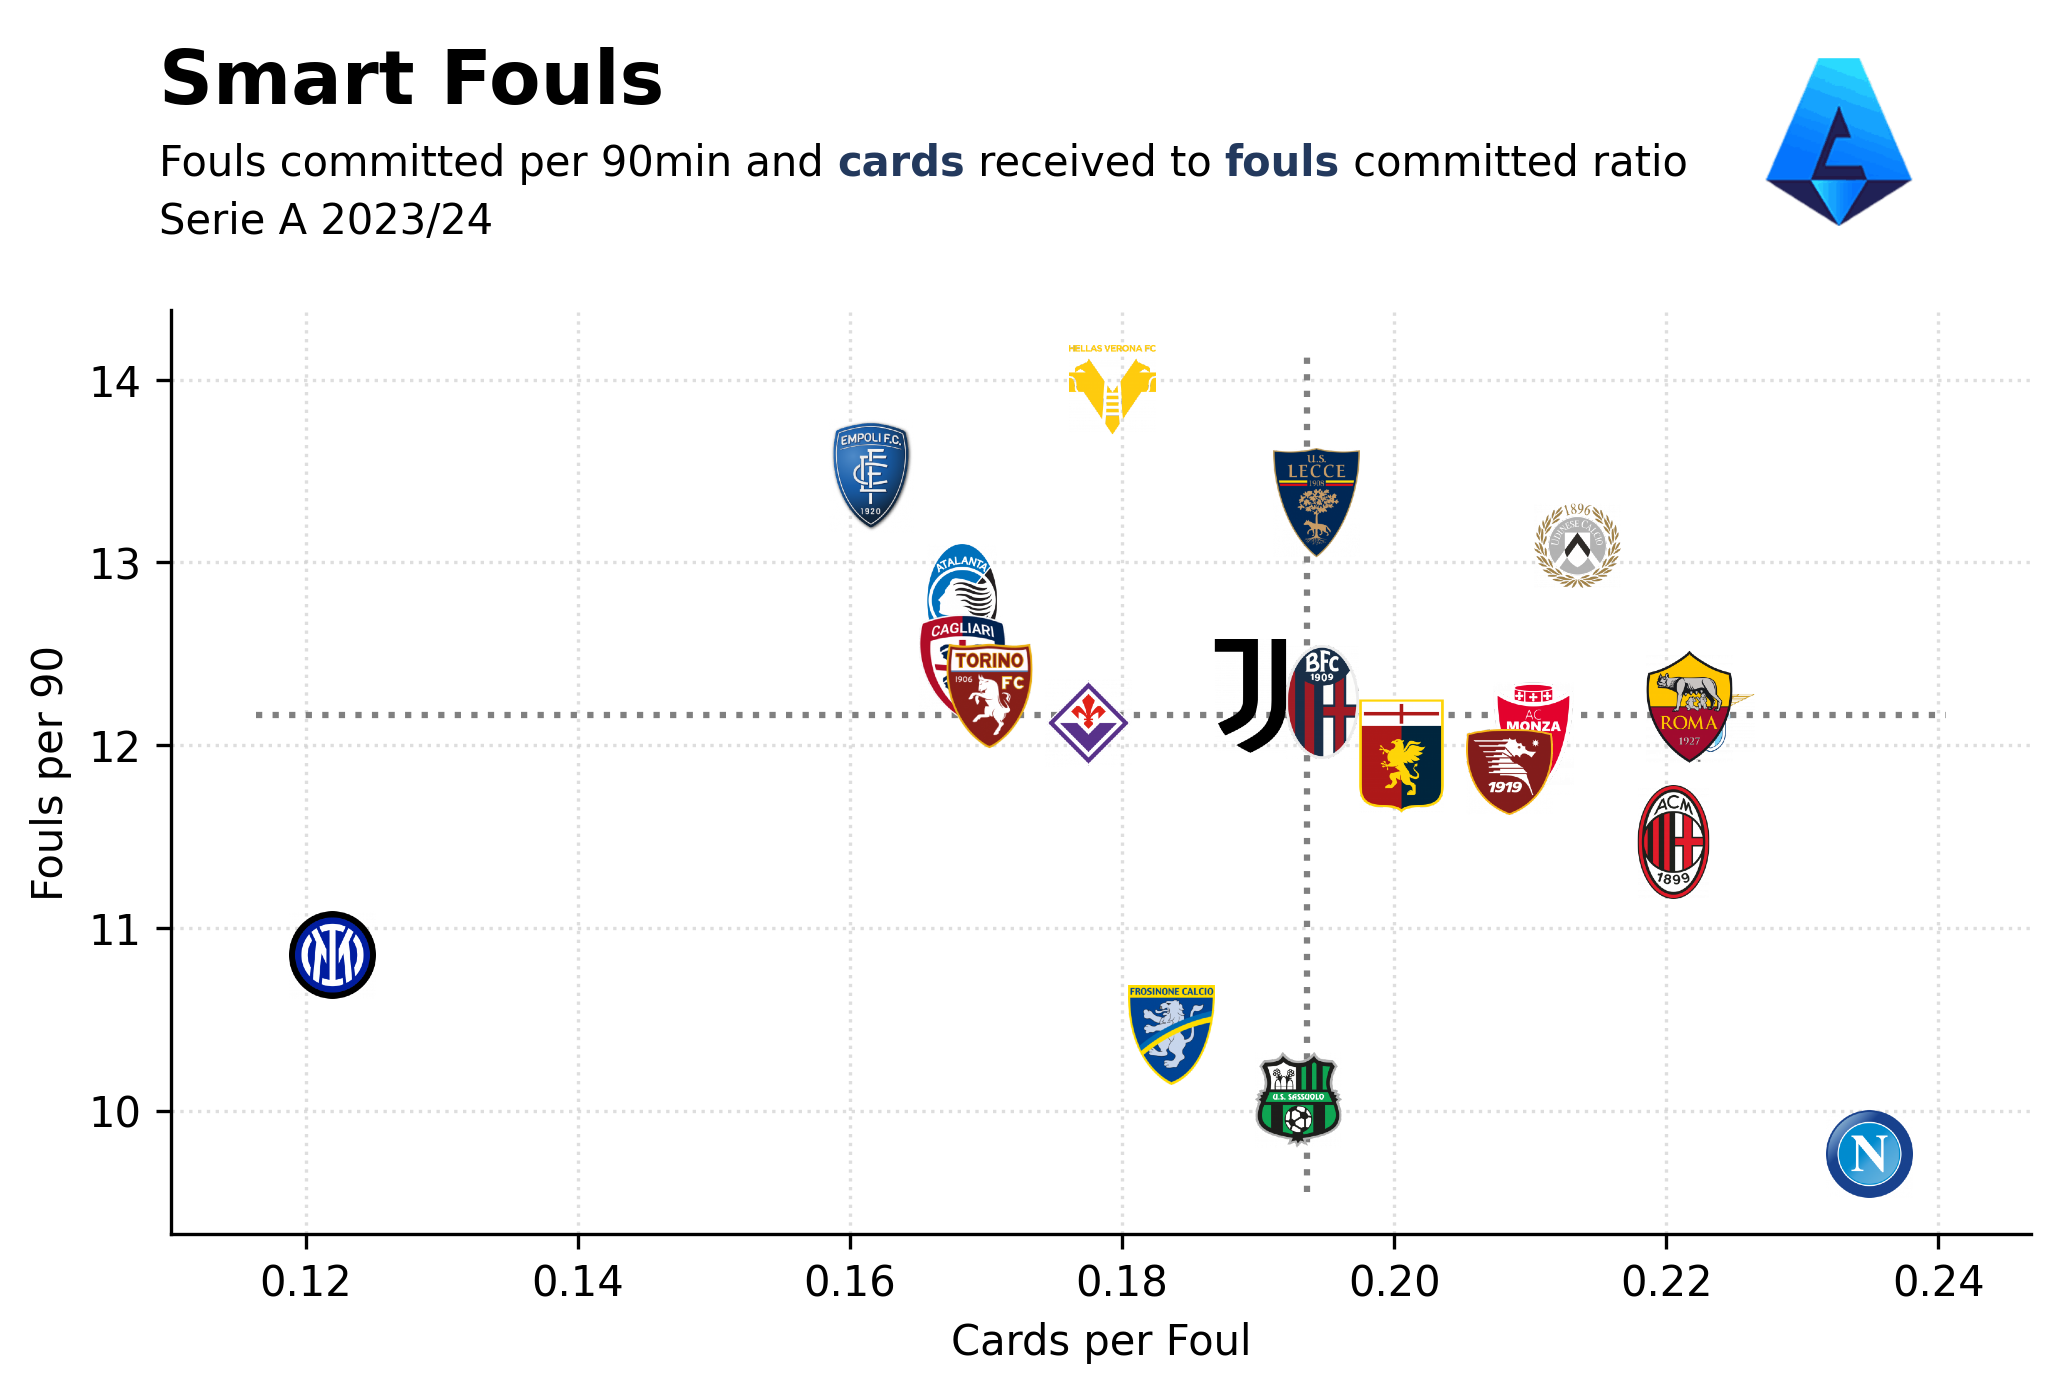

In [55]:
fig = plt.figure(figsize=(8, 4), dpi=300, facecolor="white")
ax = plt.subplot(facecolor = "white")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(
    serieA_teams["cards per foul"],
    serieA_teams["fouls per 90"],
    color = "white"
)

ax.plot(
    [serieA_teams["cards per foul"].median(), serieA_teams["cards per foul"].median()],
    [ax.get_ylim()[0], ax.get_ylim()[1]], 
    ls = ":",
    color = "gray",
    zorder = 2
)

ax.plot(
    [ax.get_xlim()[0], ax.get_xlim()[1]],
    [serieA_teams["fouls per 90"].median(), serieA_teams["fouls per 90"].median()], 
    ls = ":",
    color = "gray",
    zorder = 2
)

ax.grid(True, ls = ":", alpha = 0.75, color = "lightgray")

ax.set_xlabel("Cards per Foul")
ax.set_ylabel("Fouls per 90")

# change ticks
#plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
#plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# plot logos
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.15, alpha=1)

for index, row in serieA_teams.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['cards per foul'], row['fouls per 90']), frameon=False)
    ax.add_artist(ab)

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "Smart Fouls",
    color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.02,
    s = "Fouls committed per 90min and <cards> received to <fouls> committed ratio\nSerie A 2023/24",
    highlight_textprops=[
        {"color": "#23395D", "weight": "bold"},
        {"color": "#23395D", "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

# scrape Fotmob's website and plot the image directly into the visual
# create a new axes object to draw the image
fotmob_url_league = "https://images.fotmob.com/image_resources/logo/leaguelogo/"

logo_ax = fig.add_axes([0.75, .95, 0.14, 0.14], zorder=1)
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_league}55.png"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

plt.savefig(
	"../figures/smart_fouls_teams.png",
	dpi = 300,
	facecolor = "white",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"../figures/smart_fouls_teams_tr.png",
	dpi = 300,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)

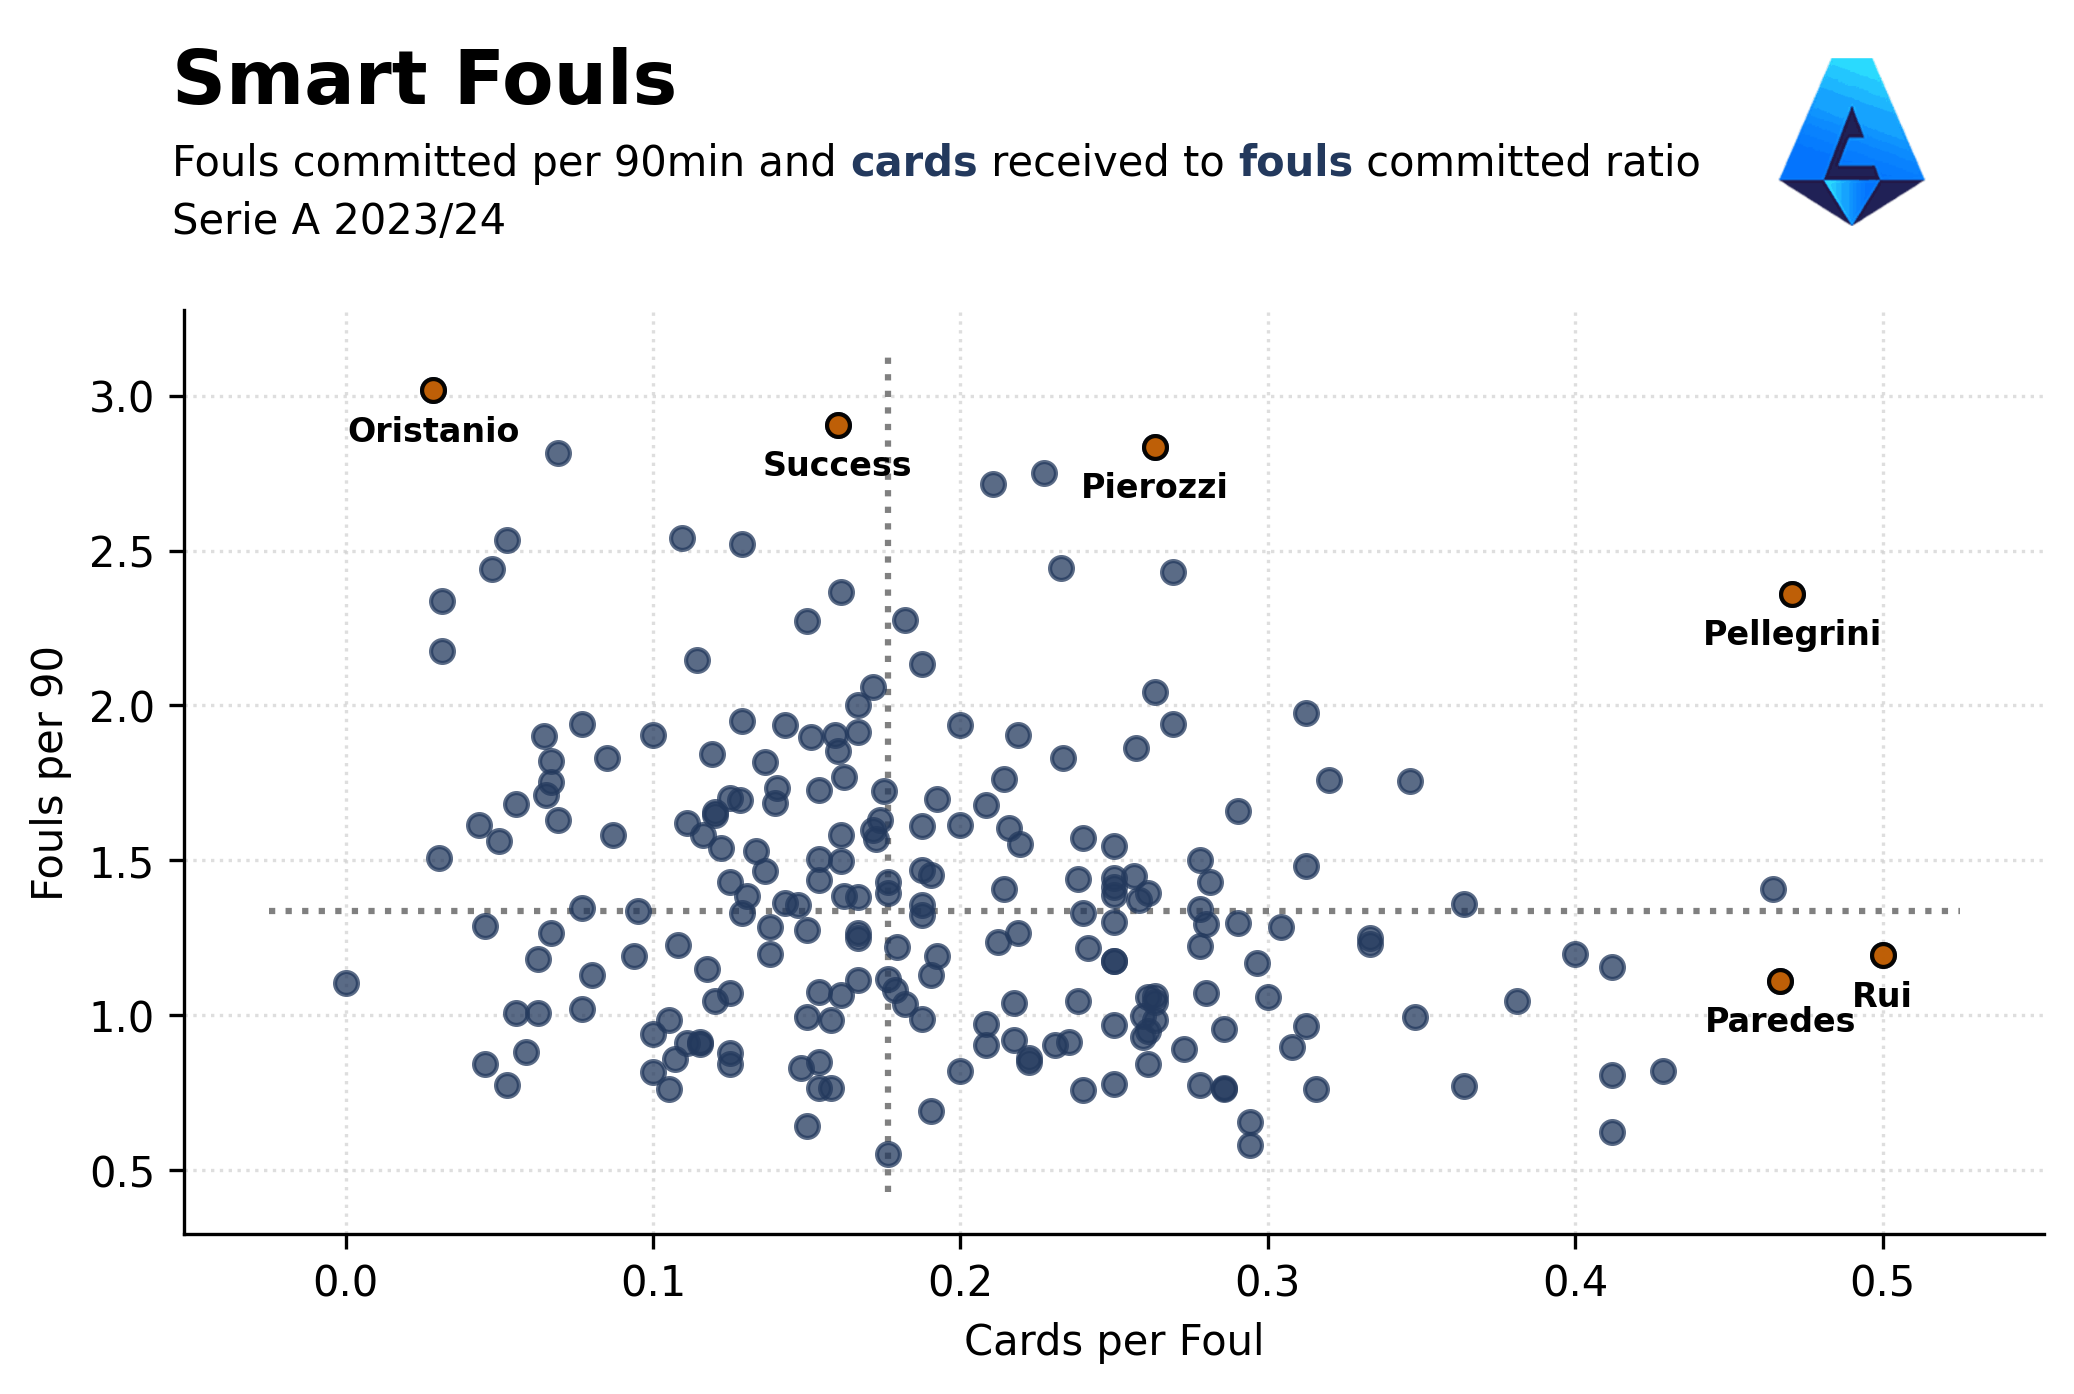

In [56]:
fig = plt.figure(figsize=(8, 4), dpi=300, facecolor="white")
ax = plt.subplot(facecolor = "white")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(
    serieA_players_filtered["cards per foul"],
    serieA_players_filtered["fouls per 90"],
    s = 30,
    alpha = 0.75,
    color = "#23395D",
    zorder = 3
)

ax.scatter(
    serieA_players_outliers["cards per foul"],
    serieA_players_outliers["fouls per 90"],
    s = 30,
    alpha = 0.95,
    color = "#C45F00",
    zorder = 3,
    ec = "#000000"
)

ax.plot(
    [serieA_players_filtered["cards per foul"].median(), serieA_players_filtered["cards per foul"].median()],
    [ax.get_ylim()[0], ax.get_ylim()[1]], 
    ls = ":",
    color = "gray",
    zorder = 2
)

ax.plot(
    [ax.get_xlim()[0], ax.get_xlim()[1]],
    [serieA_players_filtered["fouls per 90"].median(), serieA_players_filtered["fouls per 90"].median()], 
    ls = ":",
    color = "gray",
    zorder = 2
)

ax.grid(True, ls = ":", alpha = 0.75, color = "lightgray")

for index, name in enumerate(serieA_players_outliers["Player"]):
    X = serieA_players_outliers["cards per foul"].iloc[index]
    Y = serieA_players_outliers["fouls per 90"].iloc[index]
    text_ = ax.annotate(
        xy = (X, Y),
        text = name.split(" ")[1],
        ha = "center",
        va = "center",
        xytext = (0, -10),
        textcoords = "offset points",
        size = 8,
        weight = "bold"
    )

ax.set_xlabel("Cards per Foul")
ax.set_ylabel("Fouls per 90")

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "Smart Fouls",
    color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.02,
    s = "Fouls committed per 90min and <cards> received to <fouls> committed ratio\nSerie A 2023/24",
    highlight_textprops=[
        {"color": "#23395D", "weight": "bold"},
        {"color": "#23395D", "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

# scrape Fotmob's website and plot the image directly into the visual
# create a new axes object to draw the image
fotmob_url_league = "https://images.fotmob.com/image_resources/logo/leaguelogo/"

logo_ax = fig.add_axes([0.75, .95, 0.14, 0.14], zorder=1)
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_league}55.png"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

plt.savefig(
	"../figures/smart_fouls_players.png",
	dpi = 300,
	facecolor = "white",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"../figures/smart_fouls_players_tr.png",
	dpi = 300,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)

- **_Top-Right_** | Players who committed more fouls than the league median and received a high number of cards.
- **_Bottom-Right_** | Players who committed fewer fouls but received a high number of cards, indicating they made dangerous or hard tackles.
- **_Top-Left_** | Players who committed many fouls but received fewer cards, suggesting they committed smart fouls.
- **_Bottom-Left_** | Players who committed few fouls and received few cards.